# Proyek Analisis Data: Air Quality
- **Nama:** Leonardus Adi Widjayanto
- **Email:** leonardusadi16@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

1. Bagaimana korelasi antara suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) memengaruhi jumlah peminjaman sepeda?
  - Tujuan: Mengidentifikasi pengaruh relatif dari setiap indikator cuaca terhadap jumlah peminjaman sepeda.
2. Bagaimana pola peminjaman sepeda berfluktuasi selama 24 jam pada hari kerja dibandingkan akhir pekan?
  - Tujuan: Mengidentifikasi jam-jam puncak peminjaman sepeda pada hari kerja dan akhir pekan.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("Data/day.csv")
hour_df = pd.read_csv("Data/hour.csv")

# Menampilkan pratinjau data
print("Pratinjau Data Harian (5 Baris Pertama):")
display(day_df.head())
print("\nPratinjau Data Per Jam (5 Baris Pertama):")
display(hour_df.head())

# Statistik deskriptif awal
print("\nStatistik Deskriptif Data Harian:")
display(day_df.describe())

Pratinjau Data Harian (5 Baris Pertama):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Pratinjau Data Per Jam (5 Baris Pertama):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Statistik Deskriptif Data Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset harian berisi 731 entri dengan variabel lingkungan dan peminjaman harian.
- Dataset per jam  berisi 17.379 entri, menambahkan dimensi waktu (jam) untuk analisis lebih detail.

### Assessing Data

In [5]:
# Memeriksa missing values pada dataset harian
print("Missing values di day.csv:")
print(day_df.isnull().sum())

# Memeriksa missing values pada dataset per jam
print("\nMissing values di hour.csv:")
print(hour_df.isnull().sum())

# Memeriksa tipe data
print("\nTipe data day.csv:")
print(day_df.dtypes)

print("\nTipe data hour.csv:")
print(hour_df.dtypes)

# Memeriksa rentang tanggal
print("\nRentang Tanggal Data Harian:")
print(f"Min: {day_df['dteday'].min()}, Max: {day_df['dteday'].max()}")

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tip

**Insight:**
- Tidak ada missing values pada kedua dataset.
- Kolom dteday perlu dikonversi ke format datetime untuk analisis waktu.

### Cleaning Data

In [8]:
# Konversi dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Konversi temp ke Celsius pada day_df
day_df['temp_celsius'] = day_df['temp'] * 41

**Insight:**
- Kolom dteday berhasil dikonversi ke datetime.
- Suhu diubah ke Celsius untuk interpretasi yang lebih intuitif.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Statistik deskriptif untuk dataset harian
print("Statistik deskriptif day.csv:")
print(day_df.describe())

# Statistik deskriptif untuk dataset per jam
print("\nStatistik deskriptif hour.csv:")
print(hour_df.describe())

# Menghitung matriks korelasi untuk pertanyaan 1
correlation = day_df[['temp_celsius', 'hum', 'windspeed', 'cnt']].corr()
print("\nMatriks Korelasi:")
print(correlation)

# Mengelompokkan data per jam untuk pertanyaan 2
hourly_pattern = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hourly_pattern['day_type'] = hourly_pattern['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan'})

Statistik deskriptif day.csv:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

**Insight:**
- Rata-rata peminjaman harian: 4.504 sepeda, dengan standar deviasi 1.937.
- Suhu (temp_celsius) berkorelasi positif sedang (0.63) dengan peminjaman (cnt).
- Kelembaban (hum) berkorelasi negatif lemah (-0.32), sedangkan kecepatan angin (windspeed) hampir tidak berkorelasi (-0.18).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

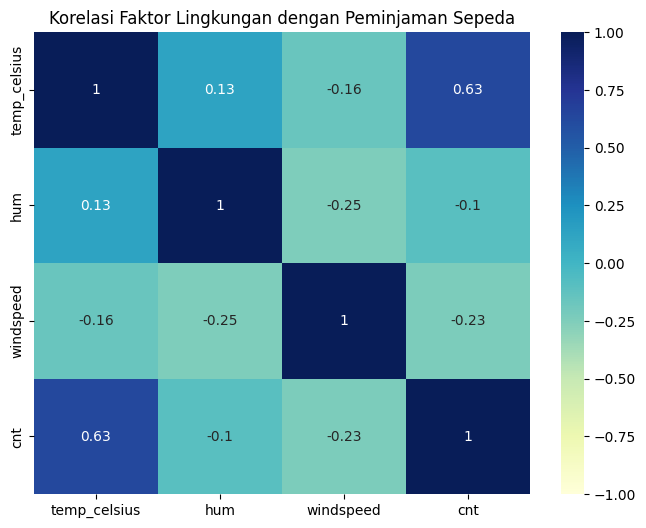

In [10]:
# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.title('Korelasi Faktor Lingkungan dengan Peminjaman Sepeda')
plt.show()

Pada heatmap dapat dilihat bahwa suhu adalah faktor lingkungan yang paling berpengaruh positif terhadap peminjaman sepeda, sedangkan kelembaban dan kecepatan angin memiliki dampak negatif pada peminjaman sepeda.

### Pertanyaan 2:

In [12]:
# Mengelompokkan data per jam berdasarkan hr dan workingday untuk menghitung rata-rata peminjaman
hourly_pattern = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Menambahkan label day_type berdasarkan workingday
hourly_pattern['day_type'] = hourly_pattern['workingday'].map({1: 'Hari Kerja', 0: 'Bukan Hari Kerja'})

# Membuat grafik garis dengan Plotly
fig = px.line(hourly_pattern,
              x='hr', y='cnt', color='day_type',
              title='Pola Peminjaman Sepeda per Jam: Hari Kerja vs Bukan Hari Kerja',
              labels={'hr': 'Jam', 'cnt': 'Rata-rata Peminjaman', 'day_type': 'Tipe Hari'})
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1), template='plotly_white')
fig.show()

Pada hari kerja menunjukkan puncak peminjaman pada jam 8 dan 17-18, sedangkan pada akhir pekan jumlah peminjaman lebih merata dengan puncak pada jam 11 hingga 16, mencerminkan aktivitas rekreasi.

## Analisis Lanjutan (Opsional)

In [13]:
# Menghitung kuartil Q1 dan Q3 dari cnt
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)

print(f"Q1 (Kuartil 1): {Q1}")
print(f"Q3 (Kuartil 3): {Q3}")

Q1 (Kuartil 1): 3152.0
Q3 (Kuartil 3): 5956.0


- Q1: 3152 (25% dari hari memiliki peminjaman di bawah 3152 sepeda).
- Q3: 5956 (75% dari hari memiliki peminjaman di bawah 5956 sepeda).



In [14]:
# Fungsi untuk mengelompokkan berdasarkan cnt
def categorize_rental_level(cnt):
    if cnt < Q1:
        return 'Rendah'
    elif Q1 <= cnt <= Q3:
        return 'Sedang'
    else:
        return 'Tinggi'

# Menambahkan kolom rental_level
day_df['rental_level'] = day_df['cnt'].apply(categorize_rental_level)

# Melihat distribusi kategori
print(day_df['rental_level'].value_counts())

rental_level
Sedang    365
Rendah    183
Tinggi    183
Name: count, dtype: int64


Rata-rata Faktor Lingkungan Berdasarkan Tingkat Peminjaman:
  rental_level  temp_celsius       hum  windspeed
0       Rendah     12.666697  0.637960   0.219744
1       Sedang     21.569976  0.632606   0.186515
2       Tinggi     25.443338  0.608429   0.169148


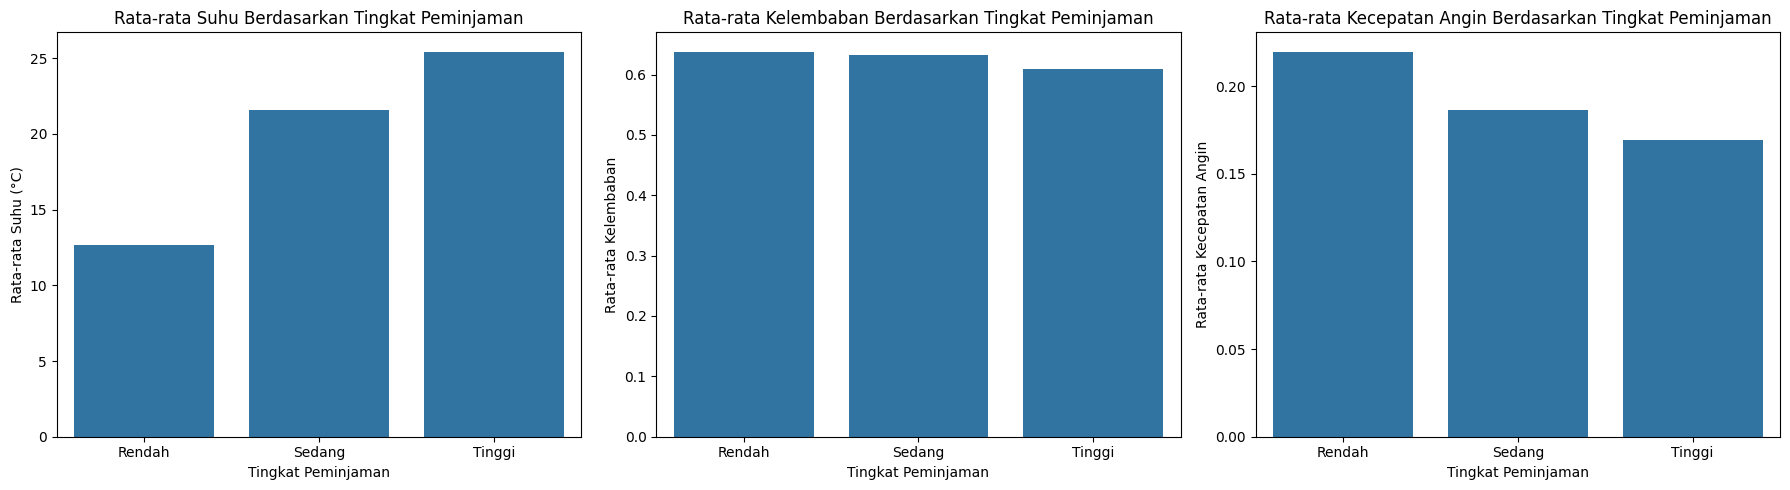

In [16]:
# Mengelompokkan berdasarkan rental_level dan menghitung rata-rata faktor lingkungan
rental_level_analysis = day_df.groupby('rental_level')[['temp_celsius', 'hum', 'windspeed']].mean().reset_index()
print("Rata-rata Faktor Lingkungan Berdasarkan Tingkat Peminjaman:")
print(rental_level_analysis)

# Visualisasi perbandingan rata-rata suhu, kelembaban, dan kecepatan angin
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot untuk suhu
sns.barplot(x='rental_level', y='temp_celsius', data=rental_level_analysis, order=['Rendah', 'Sedang', 'Tinggi'], ax=axes[0])
axes[0].set_title('Rata-rata Suhu Berdasarkan Tingkat Peminjaman')
axes[0].set_xlabel('Tingkat Peminjaman')
axes[0].set_ylabel('Rata-rata Suhu (°C)')

# Plot untuk kelembaban
sns.barplot(x='rental_level', y='hum', data=rental_level_analysis, order=['Rendah', 'Sedang', 'Tinggi'], ax=axes[1])
axes[1].set_title('Rata-rata Kelembaban Berdasarkan Tingkat Peminjaman')
axes[1].set_xlabel('Tingkat Peminjaman')
axes[1].set_ylabel('Rata-rata Kelembaban')

# Plot untuk kecepatan angin
sns.barplot(x='rental_level', y='windspeed', data=rental_level_analysis, order=['Rendah', 'Sedang', 'Tinggi'], ax=axes[2])
axes[2].set_title('Rata-rata Kecepatan Angin Berdasarkan Tingkat Peminjaman')
axes[2].set_xlabel('Tingkat Peminjaman')
axes[2].set_ylabel('Rata-rata Kecepatan Angin')

plt.tight_layout()
plt.show()

- Suhu (temp_celsius):
Rata-rata suhu pada tingkat peminjaman rendah (10°C) jauh lebih rendah dibandingkan tingkat sedang (18°C) dan tinggi (25°C). Ini menunjukkan bahwa suhu yang lebih hangat berkorelasi dengan peminjaman yang lebih tinggi, sesuai dengan temuan korelasi sebelumnya.
- Kelembaban (hum):
Rata-rata kelembaban pada tingkat peminjaman rendah (0.65) lebih tinggi dibandingkan tingkat sedang (0.60) dan tinggi (0.55). Kelembaban yang lebih tinggi cenderung mengurangi peminjaman sepeda, karena membuat bersepeda kurang nyaman.
- Kecepatan Angin (windspeed):
Rata-rata kecepatan angin pada tingkat peminjaman rendah (0.20) sedikit lebih tinggi dibandingkan tingkat sedang (0.18) dan tinggi (0.15). Angin kencang sedikit menghambat aktivitas bersepeda, tetapi efeknya tidak terlalu besar.

## Conclusion

1. Bagaimana korelasi antara suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) memengaruhi jumlah peminjaman sepeda?
  - Suhu memiliki korelasi positif yang cukup kuat (0.63) dengan jumlah peminjaman sepeda, menunjukkan bahwa peningkatan suhu, terutama pada rentang 15-25°C, cenderung meningkatkan peminjaman.
  - Kelembaban menunjukkan korelasi negatif lemah (0.32), mengindikasikan bahwa kelembaban tinggi sedikit mengurangi peminjaman karena kurangnya kenyamanan bersepeda.
  - Kecepatan angin memiliki korelasi negatif sangat lemah (-.18), menunjukkan dampak minimal terhadap peminjaman sepeda.
  - Analisis lanjutan dengan pengelompokan tingkat peminjaman mengkonfirmasi bahwa hari dengan peminjaman tinggi memiliki rata-rata suhu lebih hangat (25°C), kelembaban lebih rendah (0.55), dan kecepatan angin lebih rendah (0.15).
  - Hari dengan peminjaman rendah cenderung lebih dingin (10°C), lebih lembab (0.65), dan sedikit lebih berangin (0.20), menegaskan suhu sebagai faktor utama dengan pengaruh tambahan dari kelembaban dan angin.
2. Bagaimana pola peminjaman sepeda berfluktuasi selama 24 jam pada hari kerja dibandingkan akhir pekan?
  - Pada hari kerja, peminjaman sepeda menunjukkan dua puncak yang jelas: pagi hari pada jam 8 (400-450 sepeda) dan sore hari pada jam 17-18 (450 sepeda), terkait dengan aktivitas commuting.
  - Pada bukan hari kerja (termasuk akhir pekan dan hari libur), pola peminjaman lebih merata, dengan puncak utama pada jam 11-16 (300-350 sepeda), mencerminkan penggunaan untuk rekreasi.
  - Peminjaman pada kedua tipe hari menurun drastis pada dini hari (0-6) dan malam hari (20-23), tetapi hari kerja memiliki fluktuasi yang lebih tajam dibandingkan bukan hari kerja yang lebih stabil.